In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numba import njit
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size

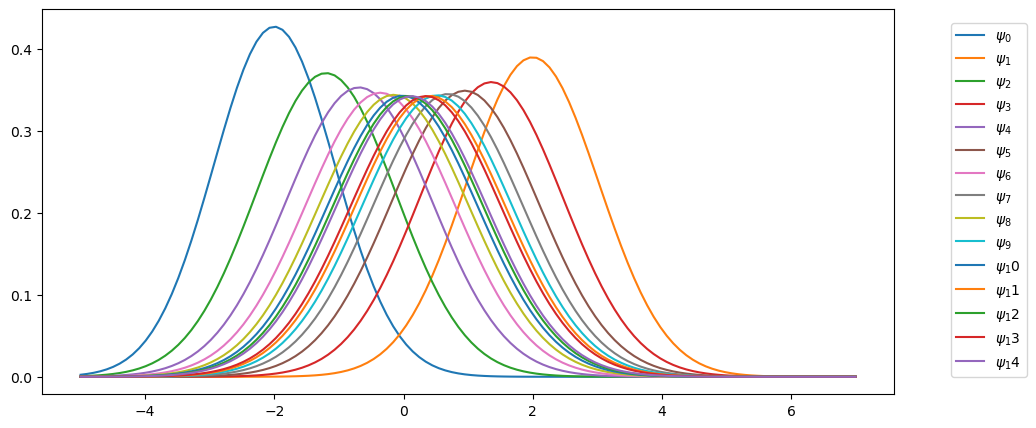

In [ ]:
# plotting {psi_t} given initial params
a,b,c = -0.8,0.4,0.7
mu, v = 3.0, 0.6

sim_length = 15 # max val of t-1 (since t starts at 0)
grid = np.linspace(-5,7,120)

fig, ax = plt.subplots()

for t in range(sim_length):
    # getting next mean and var based on current vals
    # formula derivation in obsidian notes
    mu = a * mu + b
    v = a**2 * v + c**2

    ax.plot(grid,
            norm.pdf(grid,loc=mu,scale=np.sqrt(v)), # calculates pdf value (y-axis) for each point in grid, scale is stdev so we use sqrt(v)
            label = fr"$\psi_{t}$")
    
ax.legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=1) # idk
plt.show()

# clearly converging to zero or some near-zero value

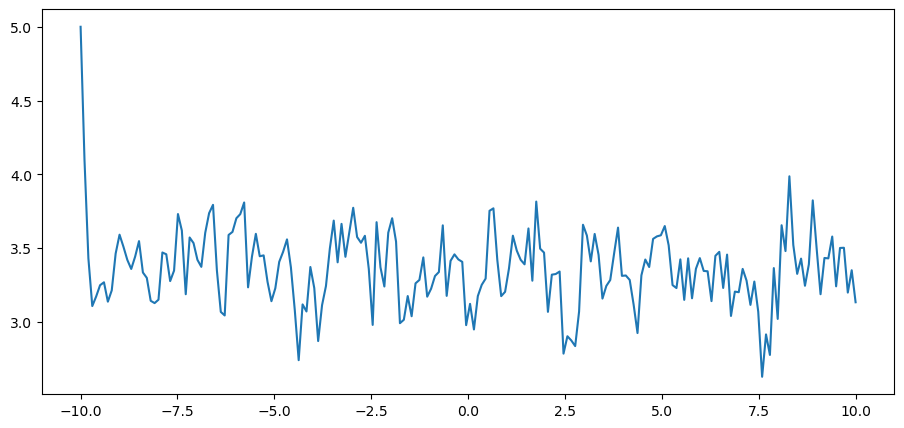

In [23]:
# plotting the time series {X_t}
# X_t = aX_{t-1} + b + cW_t
a,b,c = 0.4, 2, 0.2
length = 200

x_axis = np.linspace(-10,10,length)
y_axis = np.zeros(length)
y_axis[0] = 5 # X_0

noise = np.random.randn(length)

for t in range(1,length):
    y_axis[t] = a * y_axis[t-1] + b + c * noise[t]

plt.plot(x_axis,y_axis)
plt.show()

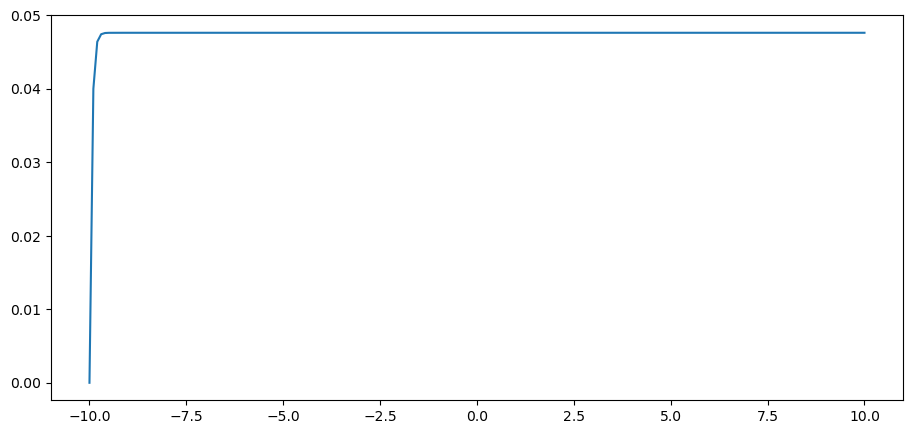

In [ ]:
# plotting the variance of the above
# v_t = a^2 * v_{t-1} + c^2

var_array = np.zeros(length)
for t in range(1,length):
    var_array[t] = a**2 * var_array[t-1] + c**2

plt.plot(x_axis,var_array)
plt.show()

# variance converges to 0.047, c^2 / 1 - a^2

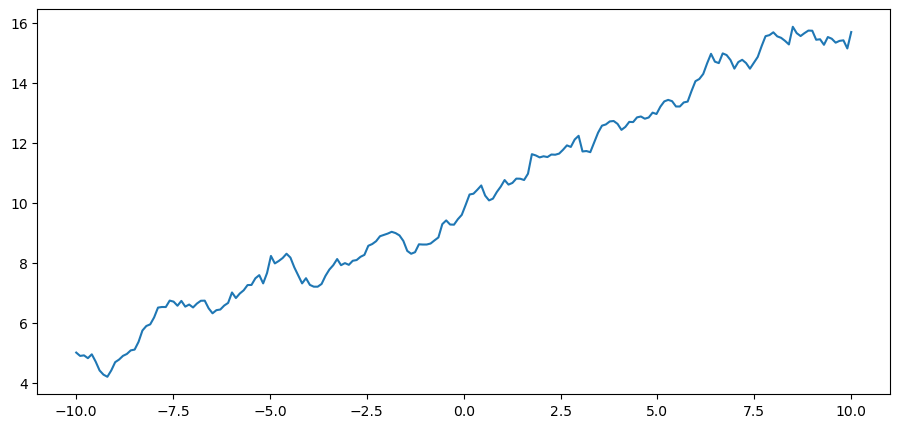

In [30]:
# plotting the time series {X_t} but with a = 1 (like a random walk)
# X_t = aX_{t-1} + b + cW_t
a,b,c = 1, 0.05, 0.2
length = 200

x_axis = np.linspace(-10,10,length)
y_axis = np.zeros(length)
y_axis[0] = 5 # X_0

noise = np.random.randn(length)

for t in range(1,length):
    y_axis[t] = a * y_axis[t-1] + b + c * noise[t]

plt.plot(x_axis,y_axis)
plt.show()

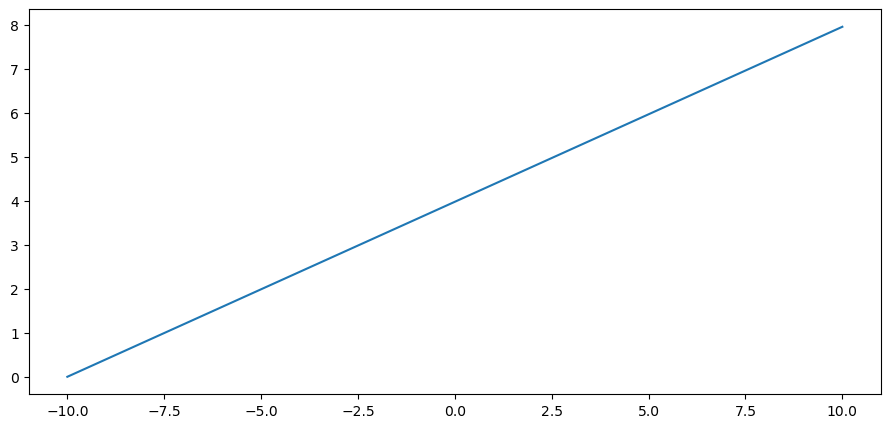

In [ ]:
# plotting the variance of the above
# v_t = a^2 * v_{t-1} + c^2

var_array = np.zeros(length)
for t in range(1,length):
    var_array[t] = a**2 * var_array[t-1] + c**2

plt.plot(x_axis,var_array)
plt.show()

# variance grows linearly over time, doesnt converge

# Exercise 33.1
Let $k$ be a natural number.

The $k^{th}$ central moment of a rv is defined as $M_{k} := \mathbb{E}[(X-\mathbb{E}(X))^k]$. If that rv is $N(\mu,\sigma^{2})$, it is known that $$M_{k}=\begin{cases}
0 &  & \text{if } k \text{ is odd} \\
\sigma^{k}(k-1)!! &  & \text{ if }k\text{ is even}
\end{cases}$$

According to the ergodicity formula, we should have $\dfrac{1}{m}\sum \limits_{t=1}^{m}(X_{t}-\mu^{*})^{k}\approx M_{k}$ for a large $m$.

Confirm this by simulation at a range of $k$ using the default params from the lecture.

In [7]:
@njit
def double_factorial(n):
    if n == 0 or n == -1:
        return 1
    result = 1
    while n > 1:
        result *= n
        n -= 2
    return result

# params from the lecture
a, b, c = 0.9, 0.1, 0.5
mean, v = -3.0, 0.6

m = 10**8 # length of the series
W = np.random.randn(m) # noise distr
k = 9 # kth moment, vary k and test to verify

E = b/(1-a) # mu star: convergent value of mean
V = c**2 / (1- a**2) # v star: convergent value of variance

@njit
def main():
    series = np.zeros(m)
    series[0] = -3.0 # initial mean

    for t in range(1,m):
        series[t] = a * series[t-1] + b + c * W[t]

    totalsum = 0
    for X in series:
        totalsum += (X-E)**k

    print(totalsum/m)

    if k % 2 == 0:
        print(f"Convergence target: {double_factorial(k-1)*(V)**(k/2)}")
    else:
        print(f"Convergence target: {0}")

main()

# Result: it does converge well for m = 10^8 and small k
# but the larger the k, the larger the deviation from the expected convergence value

-5.013496928541938
Convergence target: 0
